In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline
sns.set()

In [2]:
#Reading the data into the notebook
df = pd.read_csv(r"C:\Users\ljeffery\Documents\IandD\Kaggle\Untitled Folder\abalone.csv")

In [3]:
#Checking the shape of the data
df.shape

(4177, 9)

In [4]:
#Looking at the data types and count
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
Sex               4177 non-null object
Length            4177 non-null float64
Diameter          4177 non-null float64
Height            4177 non-null float64
Whole weight      4177 non-null float64
Shucked weight    4177 non-null float64
Viscera weight    4177 non-null float64
Shell weight      4177 non-null float64
Rings             4177 non-null int64
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [5]:
#summary statistics of numerical values
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [6]:
#summary statistics of non numerical values
df.describe(include=['object'])

,Sex
count,4177
unique,3
top,M
freq,1528


In [7]:
#Creating the Target Variable Age
df['Age'] = df['Rings'] + 1.5

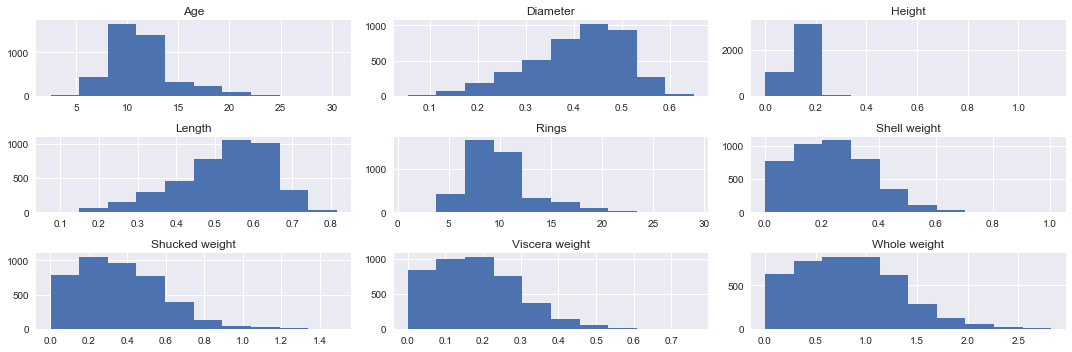

In [8]:
#Checking the spread of the variables
features = ['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings', 'Age']
df[features].hist(figsize =(15,5), layout=(3,3))
plt.tight_layout()

<function matplotlib.pyplot.show(*args, **kw)>

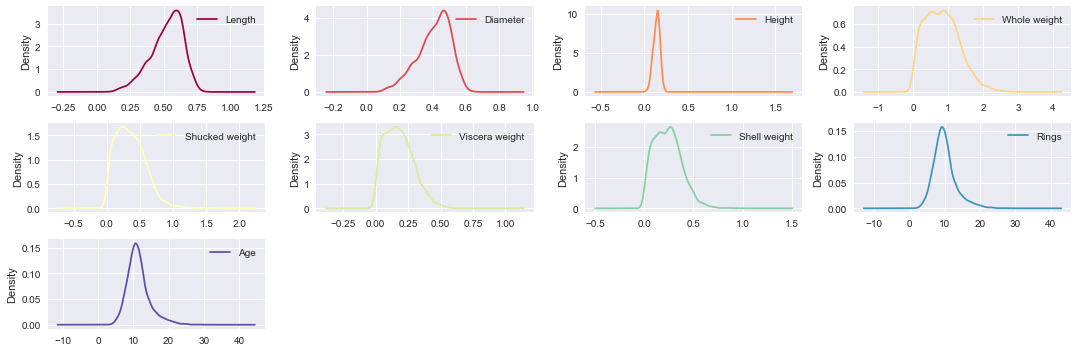

In [9]:
#Checking the distribution of the features
df[features].plot(kind='density', layout=(3,4), subplots = True, sharex=False, figsize = (15,5), cmap= 'Spectral')
plt.tight_layout()
plt.show

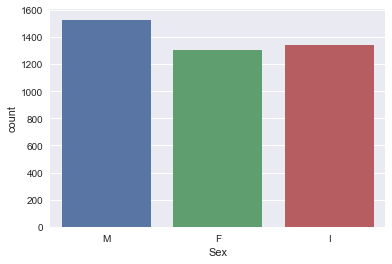

In [10]:
#Looking at the count of the variable Sex
sns.countplot(x = 'Sex', data = df)

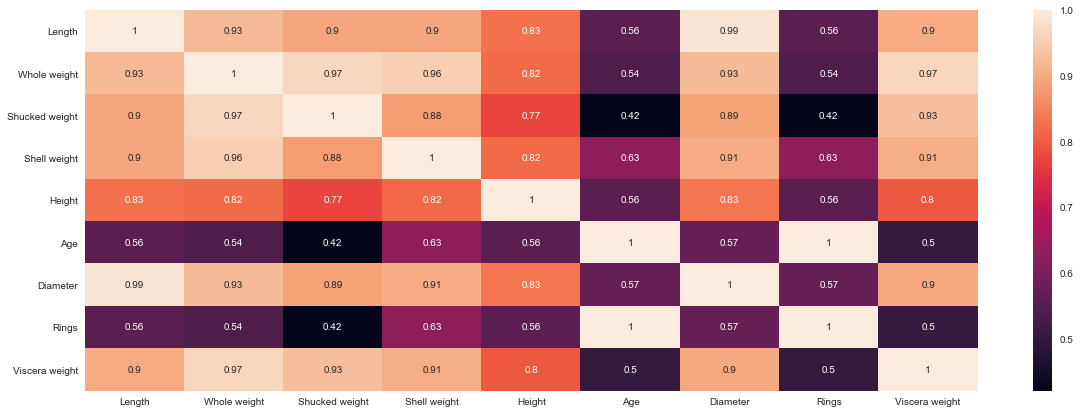

In [11]:
#Heatmap of the correlation of the numerical values
numerical = list(set(df.columns) - set(['Sex']))

corr_matrix = df[numerical].corr()
plt.figure(figsize=(20,7))
sns.heatmap(corr_matrix, annot=True)

# plt.figure(figsize=(20,7))
# sns.heatmap(data[numerical_features].corr(), annot=True)

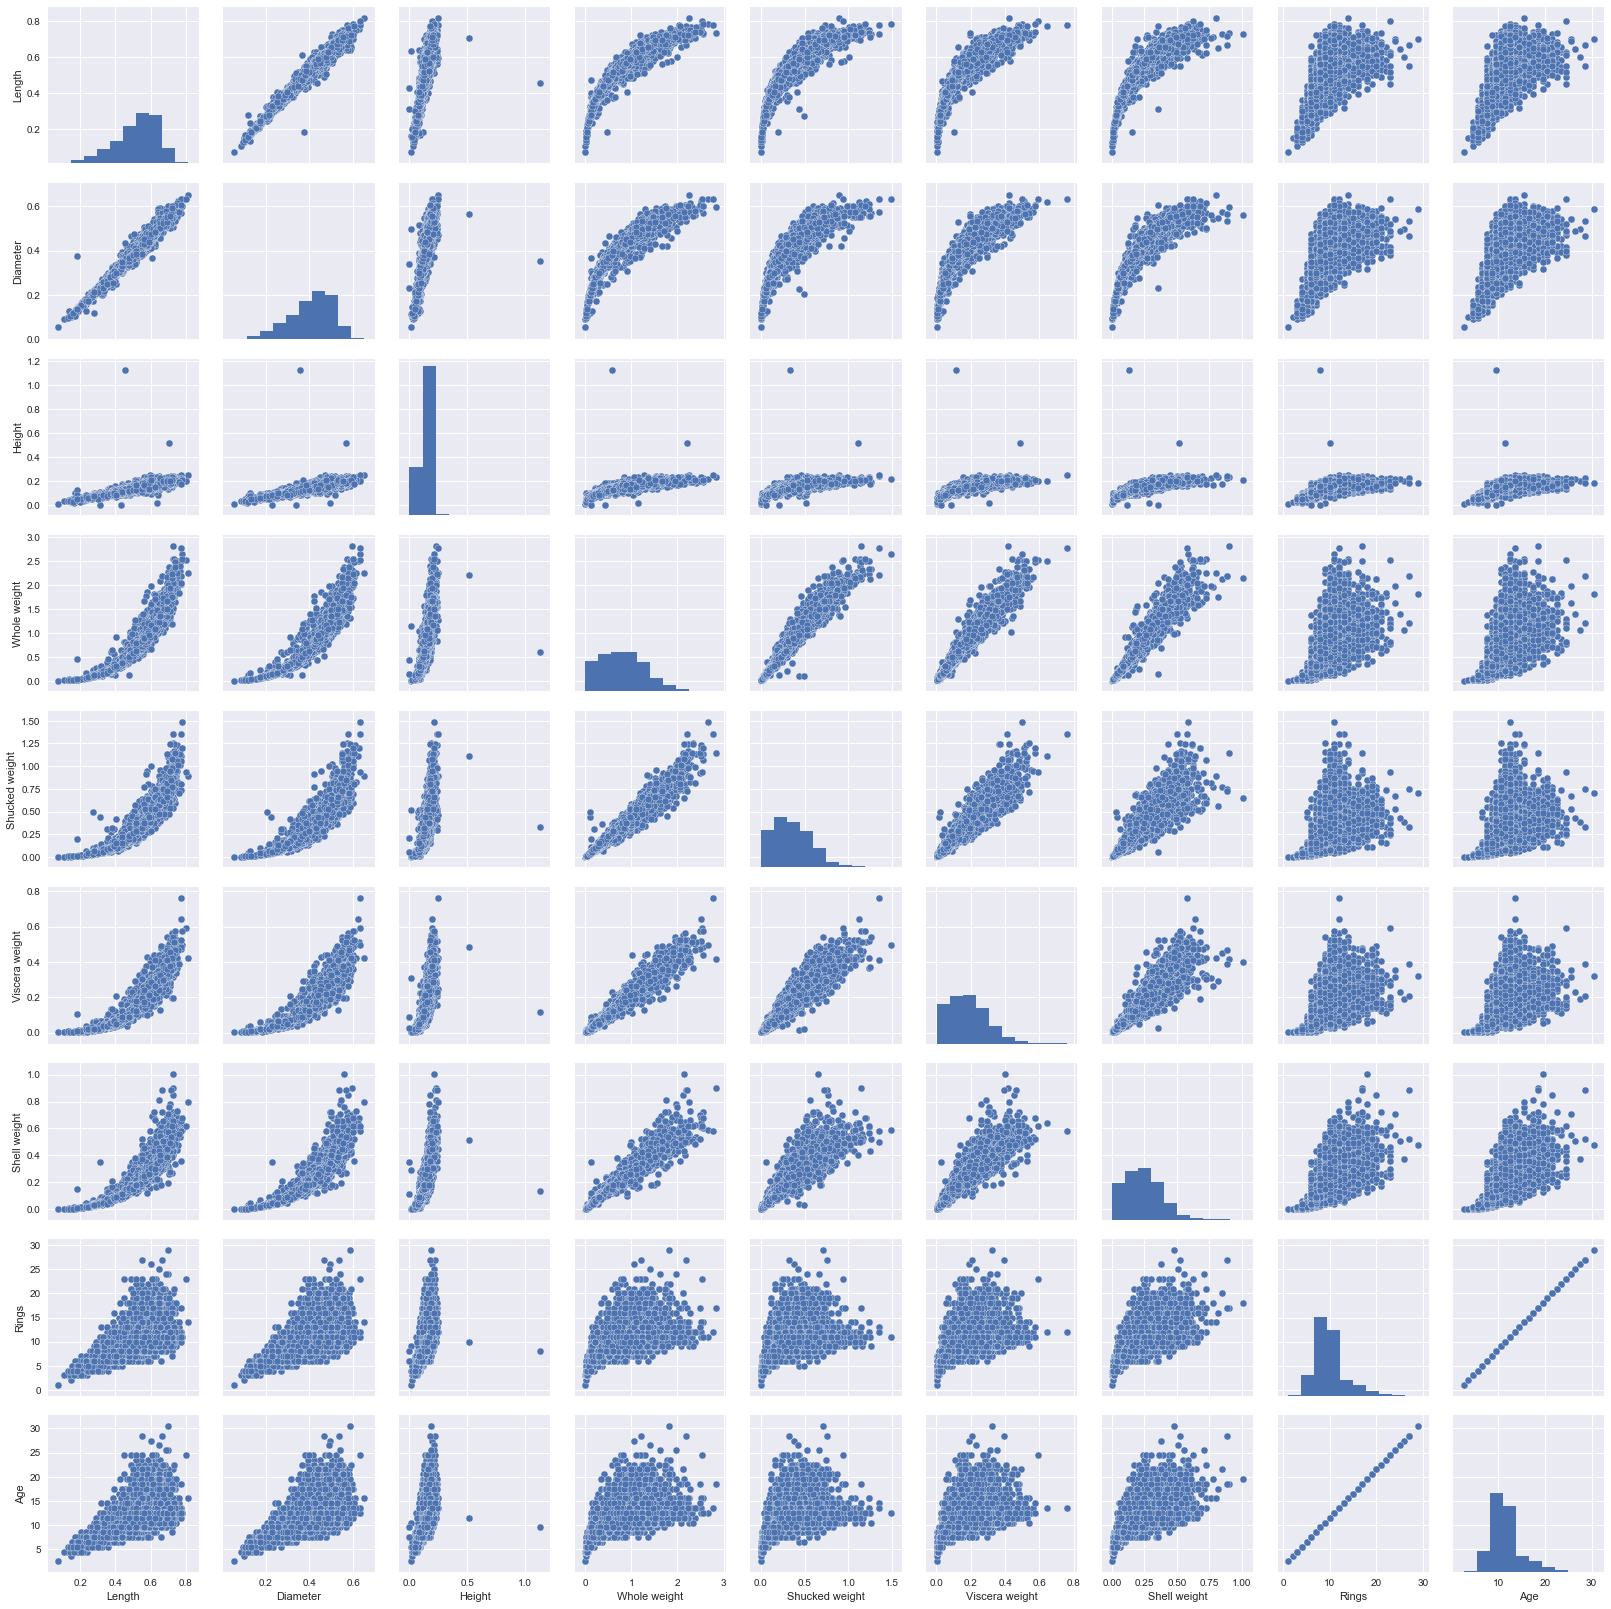

In [12]:
#Pairplot of all of the features
sns.pairplot(df)

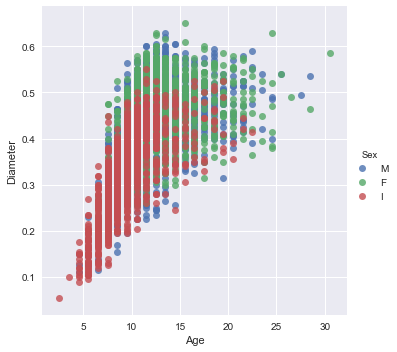

In [13]:
#Plot comparing age and diameter, with sex 
sns.lmplot('Age','Diameter', data = df, hue = 'Sex', fit_reg = False )

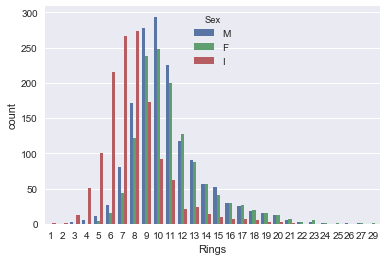

In [14]:
#Comparing the count of the size of the rings for the different sexes
sns.countplot('Rings', data = df, hue = 'Sex')

<function matplotlib.pyplot.show(*args, **kw)>

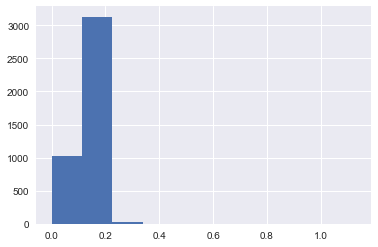

In [15]:
#Checking the distribution of Height as the pairplot showed outliers
plt.hist('Height', data = df)
plt.show

Data Engineering

In [16]:
#Converting the variables to indicator variables
df = pd.get_dummies(df)

In [17]:
#dropping the variable Rings as it is no longer needed
df.drop('Rings', axis = 1, inplace = True)

In [18]:
#Checking that Rings has been dropped and that the variable sex has been one hot encoded
df.sample(5)

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age,Sex_F,Sex_I,Sex_M
35,0.465,0.355,0.105,0.4795,0.2270,0.1240,0.125,9.5,0,0,1
2247,0.470,0.365,0.120,0.5430,0.2295,0.1495,0.150,10.5,1,0,0
1209,0.780,0.630,0.215,2.6570,1.4880,0.4985,0.586,12.5,1,0,0
376,0.630,0.490,0.190,1.1775,0.4935,0.3365,0.285,12.5,0,0,1
732,0.520,0.400,0.120,0.8230,0.2980,0.1805,0.265,16.5,0,0,1


In [19]:
#building plots to check for outliers 
def BuildPlot(x_var, y_var, title, xlabel, ylabel):
    plt.scatter(x = x_var, y = y_var)
    plt.grid(True)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.figure(figsize=(12,4))
    plt.show()

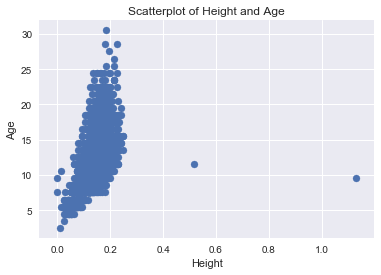

<Figure size 864x288 with 0 Axes>

In [20]:
#investigating the outliers in Height
BuildPlot(df['Height'], df['Age'], 'Scatterplot of Height and Age', 'Height', 'Age' )

In [21]:
#Removing the outliers in height
df.drop(df[(df['Height']> 0.4) & (df['Age'] < 15)].index, inplace=True)
# data.drop(data[(data['Viscera weight']<0.5) & (data['age'] > 25)].index, inplace=True)

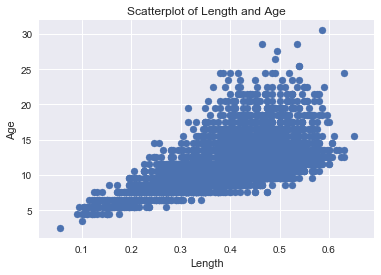

<Figure size 864x288 with 0 Axes>

In [22]:
#investigating the outliers in Length
BuildPlot(df['Diameter'], df['Age'], 'Scatterplot of Length and Age', 'Length', 'Age' )

In [23]:
#checking for null values
print(df.isnull().sum())

Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Age               0
Sex_F             0
Sex_I             0
Sex_M             0
dtype: int64


ML

In [76]:
from sklearn.preprocessing import  StandardScaler
from sklearn.model_selection import  train_test_split, cross_val_score, GridSearchCV
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import r2_score, mean_squared_error

from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import  RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.linear_model import  Ridge
from sklearn.svm import SVR



In [83]:
#Setting X and y 
X = df.drop(['Age'], axis = 1)
y = df['Age']

In [84]:
# Split X and y into X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



Linear Regression

In [85]:
#Linear Regression
lm = LinearRegression()

# Train the model using the training sets
lm.fit(X_train, y_train)
#predicting the y values
y_pred_lm = lm.predict(X_test)

# The coefficients
print('Coefficients: \n', lm.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred_lm))
# Explained variance score: 1 is perfect prediction
print('R^Squared score: %.2f'
      % r2_score(y_test, y_pred_lm))

Coefficients: 
 [ -2.79257896  10.57519363  24.33425872   8.57007433 -18.98139851
  -9.9032715    7.52394732   0.2002103   -0.47642138   0.27621108]
Mean squared error: 4.57
R^Squared score: 0.57


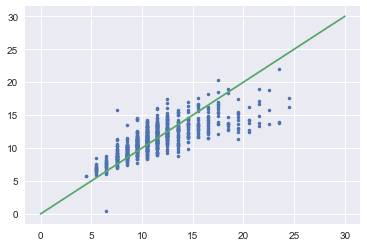

In [86]:
# plot prediction and actual data
plt.plot(y_test, y_pred_lm, '.')

# plot a line, a perfit predict would all fall on this line
x = np.linspace(0, 30, 30)
yplot = x
plt.plot(x, yplot)
plt.show()

SVR

In [89]:
# Loop of SVR Kernels and the R squared score on training data
for k in ['linear','poly','rbf','sigmoid']:
    clf = SVR(kernel=k)
    clf.fit(X_train, y_train)
    confidence = clf.score(X_train, y_train)
    print("R^2 Score", k,confidence)

R^2 Score linear 0.4826731793740805
R^2 Score poly 0.2443520230927184
R^2 Score rbf 0.42319124648352113
R^2 Score sigmoid 0.2157207073869627


In [88]:
# Loop of SVR Kernels and the R squared score on training data
for k in ['linear','poly','rbf','sigmoid']:
    clf = SVR(kernel=k)
    clf.fit(X_train, y_train)
    confidence = clf.score(X_test, y_test)
    print("R^2 Score", k,confidence)

R^2 Score linear 0.5151592150748547
R^2 Score poly 0.2576423636099233
R^2 Score rbf 0.44789668913346203
R^2 Score sigmoid 0.26330083693310957


In [99]:
#GridSearch on the two best Kernals
# Set the parameters 
parameters = [{'kernel': ['rbf'], 'gamma': [1e-4, 1e-3, 0.01, 0.1, 0.2, 0.5], 'C': [1, 10, 100, 1000]},
              {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

print("# Tuning hyper-parameters")
print()
svr = SVR()
clf = GridSearchCV(svr, parameters, cv = 4)
clf.fit(X_train, y_train)

print("Best parameters:")
print()
print(clf.best_params_)
test_confidence = clf.score(X_test, y_test)
print("R^2 Score (test)", test_confidence)

train_confidence = clf.score(X_train, y_train)
print("R^2 Score (train)", train_confidence)

# Tuning hyper-parameters

Best parameters:

{'C': 1000, 'gamma': 0.2, 'kernel': 'rbf'}
R^2 Score (test) 0.599439532306708
R^2 Score (train) 0.5777121521275754


In [100]:
#SVR using the best parameters
# Train the model using the training sets
svr = SVR(kernel = 'rbf', C = 1000, gamma = 0.2)
svr.fit(X_train, y_train)
#predicting the y values
y_pred_svr = svr.predict(X_test)

# The mean squared error
print("Mean squared error: %.3f"
      % mean_squared_error(y_test, y_pred_svr))
# Explained variance score: 1 is perfect prediction
print('R^Squared score: %.3f'
      % r2_score(y_test, y_pred_svr))


Mean squared error: 4.267
R^Squared score: 0.599


In [356]:
#Using SelectKBest to select the optimum features
selector = SelectKBest(f_regression, k ='all')
selector.fit(X, y)
pvalues = zip(X, selector.pvalues_)

pvalue_list = sorted(pvalues, key=lambda x: x[1], reverse=False)
print ('SelectKBest pvalues: ', pvalue_list)

scores = zip(X, selector.scores_)
sorted_list = sorted(scores, key=lambda x: x[1], reverse=True)
print ('SelectKBest scores: ', sorted_list)

SelectKBest pvalues:  [('Length', 0.0), ('Diameter', 0.0), ('Height', 0.0), ('Shell weight', 0.0), ('Whole weight', 5.96488928e-316), ('Viscera weight', 3.5651046181846114e-268), ('Sex_I', 1.501437837364628e-193), ('Shucked weight', 1.8728779916248044e-179), ('Sex_F', 8.434496000200166e-61), ('Sex_M', 2.4133948138032255e-32)]
SelectKBest scores:  [('Shell weight', 2714.868795772646), ('Height', 2468.238022710083), ('Diameter', 2058.951792030745), ('Length', 1875.3214889668047), ('Whole weight', 1725.4739110623184), ('Viscera weight', 1422.724591553961), ('Sex_I', 980.7228018437189), ('Shucked weight', 901.2563281613296), ('Sex_F', 279.59136941232447), ('Sex_M', 142.59362974591312)]


In [101]:
#Using select features
X_New = df[['Length', 'Height', 'Diameter', 'Shell weight', 'Viscera weight']]
y = df['Age']

# Split X and y into X_train, X_test, y_train, y_test
X_trainn, X_testn, y_train, y_test = train_test_split(X_New, y, test_size=0.3, random_state=42)

# Train the model using the training sets
lm.fit(X_trainn, y_train)

#Predicting y
y_pred2 = lm.predict(X_testn)

# The coefficients
print('Coefficients: \n', lm.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred2))
# Explained variance score: 1 is perfect prediction
print('R^squared score: %.2f' % r2_score(y_test, y_pred2))

Coefficients: 
 [ -9.53048002  33.42069978  11.39701386  16.3634503  -13.96962407]
Mean squared error: 5.41
R^squared score: 0.46


In [102]:
#SVR using the selected features 
# Train the model using the training sets
svr = SVR(kernel = 'rbf', C = 1000, gamma = 0.2)
svr.fit(X_trainn, y_train)
#predicting the y values
y_pred_svr = svr.predict(X_testn)

# The mean squared error
print("Mean squared error: %.3f"
      % mean_squared_error(y_test, y_pred_svr))
# Explained variance score: 1 is perfect prediction
print('R^Squared score: %.3f'
      % r2_score(y_test, y_pred_svr))

Mean squared error: 5.089
R^Squared score: 0.494
